In [1]:
import os, shutil, errno
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
base_dir = 'CrimeMaps_small'

try:
    os.mkdir(base_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass


train_dir = os.path.join(base_dir, 'train')
try:
    os.mkdir(train_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

validation_dir = os.path.join(base_dir, 'validation')
try:
    os.mkdir(validation_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

test_dir = os.path.join(base_dir, 'test')
try:
    os.mkdir(test_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'Hom')
try:
    os.mkdir(train_cats_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'None')
try:
    os.mkdir(train_dogs_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'Hom')
try:
    os.mkdir(validation_cats_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'None')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'Hom')
try:
    os.mkdir(test_cats_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'None')
try:
    os.mkdir(test_dogs_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

# Subsampling data

__Hom__

In [3]:
original_dataset_dir = 'C:/Users/yeage/Desktop/UMBC/DATA 602/Final/Maps'

In [4]:
import random
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(random.sample(os.listdir(original_dataset_dir+'/Hom'), 4800), test_size = 1/8)
train, val = train_test_split(train, test_size = 0.1)

In [6]:
for fname in train:
    src = os.path.join(original_dataset_dir, 'Hom', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
for fname in val:
    src = os.path.join(original_dataset_dir, 'Hom', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
for fname in test:
    src = os.path.join(original_dataset_dir, 'Hom', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

__No Hom__

In [9]:
train, test = train_test_split(random.sample(os.listdir(original_dataset_dir+'/None'), 4800), test_size = 1/8)
train, val = train_test_split(train, test_size = .1)

original_dataset_dir = original_dataset_dir+'/None'

# Copy first 1000 dog images to train_dogs_dir
for fname in train:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
for fname in val:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
for fname in test:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('total training Hom images:', len(os.listdir(train_cats_dir)))

total training Hom images: 3780


In [11]:
print('total training No Hom images:', len(os.listdir(train_dogs_dir)))

total training No Hom images: 3780


In [12]:
print('total validation Hom images:', len(os.listdir(validation_cats_dir)))

total validation Hom images: 420


In [13]:
print('total validation No Hom images:', len(os.listdir(validation_dogs_dir)))

total validation No Hom images: 420


In [14]:
print('total test Hom images:', len(os.listdir(test_cats_dir)))

total test Hom images: 600


In [15]:
print('total test No Hom images:', len(os.listdir(test_dogs_dir)))

total test No Hom images: 600


# CNN with Keras

In [16]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "MapHomClass-Augment-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir=".\logs{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])



# Preprocessing

In [19]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [20]:
tf.test.is_built_with_gpu_support()

True

In [21]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 7560 images belonging to 2 classes.
Found 840 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [24]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession
#config = ConfigProto()


In [25]:
#config.gpu_options.allow_growth = True
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [26]:
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=20,callbacks=[tensorboard])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 378 steps, validate for 20 steps
Epoch 1/10
378/378 [==============================] - 36s 94ms/step - loss: 0.6897 - acc: 0.5380 - val_loss: 0.6694 - val_acc: 0.5975
Epoch 2/10
378/378 [==============================] - 9s 23ms/step - loss: 0.6625 - acc: 0.6049 - val_loss: 0.6550 - val_acc: 0.5950
Epoch 3/10
378/378 [==============================] - 8s 22ms/step - loss: 0.6477 - acc: 0.6163 - val_loss: 0.6412 - val_acc: 0.6300
Epoch 4/10
378/378 [==============================] - 8s 22ms/step - loss: 0.6385 - acc: 0.6325 - val_loss: 0.6635 - val_acc: 0.6500
Epoch 5/10
378/378 [==============================] - 8s 22ms/step - loss: 0.6312 - acc: 0.6421 - val_loss: 0.6333 - val_acc: 0.6450
Epoch 6/10
378/378 [==============================] - 8s 22ms/step - loss: 0.6209 - acc: 0.6578 - val_loss: 0.6503 - val_acc: 0.6450
Epoch 7/10
378/378 [==============================] - 9s 22ms/step - loss: 0.6083 - acc: 0.6685 - val_loss: 

# Saving and Loading Models


In [27]:
from tensorflow import keras
#model.save('IdentifyingHomShootTimespans2HR.h5')
#trained_model = keras.models.load_model('IdentifyingHomShootTimespans.h5')
trained_model = keras.models.load_model('IdentifyingHomShootTimespans2HR.h5')

In [ ]:
#! ls

In [ ]:
#trained_model.get_layer('dense_2').weights[1]

# Data Augmentation

In [28]:
datagen = ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

In [29]:
os.path#.join(CrimeMaps_small)
original_dataset_dir+'/CrimeMaps_small'

'C:/Users/yeage/Desktop/UMBC/DATA 602/Final/Maps/None/CrimeMaps_small'

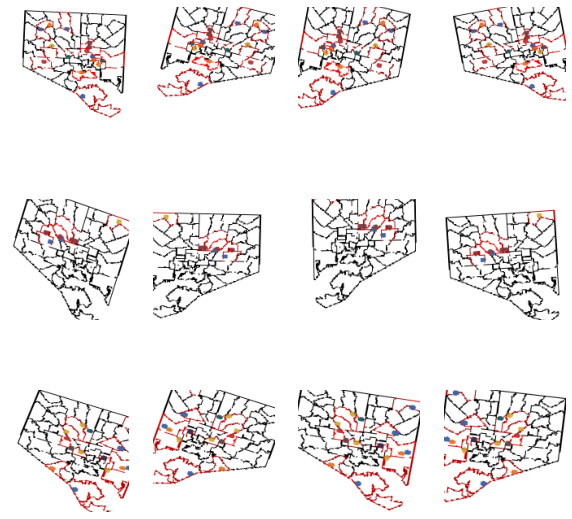

In [30]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

plt.figure(figsize=(10, 10))
image_list = []
## creating the image list as arrays
for img in [image.load_img(img_path, target_size=(150, 150)) for img_path in random.sample(fnames, 3)]:
  x = image.img_to_array(img)
  x = x.reshape((1,) + x.shape)
  ## Data Augmentation
  j = 0
  for batch in datagen.flow(x, batch_size=1):
    image_list.append(image.array_to_img(batch[0]))
    j+=1
    if j % 4==0:
      break

## plotting
for i, img in enumerate(image_list):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.axis("off")

__Continue Training with Augmented Data__

In [33]:
NAME = "MapHomClass-Augment-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir=".\logs\{}".format(NAME))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = trained_model.fit_generator(
      train_generator,
      epochs=50,
      validation_data=validation_generator,callbacks=[tensorboard])

Found 7560 images belonging to 2 classes.
Found 840 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 237 steps, validate for 27 steps
Epoch 1/50
237/237 [==============================] - 32s 134ms/step - loss: 0.5686 - acc: 0.7021 - val_loss: 0.5510 - val_acc: 0.7190
Epoch 2/50
237/237 [==============================] - 32s 135ms/step - loss: 0.5549 - acc: 0.7093 - val_loss: 0.5820 - val_acc: 0.6940
Epoch 3/50
237/237 [==============================] - 32s 135ms/step - loss: 0.5503 - acc: 0.7176 - val_loss: 0.5138 - val_acc: 0.7464
Epoch 4/50
237/237 [==============================] - 32s 135ms/step - loss: 0.5432 - acc: 0.7246 - val_loss: 0.5019 - val_acc: 0.7536
Epoch 5/50
237/237 [==============================] - 32s 135ms/step - loss: 0.5315 - acc: 0.7263 - val_loss: 0.5232 - val_acc: 0.7429
Epoch 6/50
237/237 [==============================] - 32s 135ms/step - loss: 0.5284 - acc: 0.7357 - val_loss: 0.5179 - val_acc: 0.7405
Epoch 7/50
237

In [34]:
#trained_model.save('IdentifyingHomShootTimespans_augmented_model.h5')
trained_model.save('IdentifyingHomShootTimespans_augmented_model2HR_Best.h5')

In [2]:
import tensorflow as tf

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(min_delta= 0.01, patience=1),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
]

In [ ]:
history = trained_model.fit(
      train_generator,
      epochs=5,
      validation_data=validation_generator, 
      callbacks=my_callbacks)

In [3]:
trained_model = tf.keras.models.load_model("IdentifyingHomShootTimespans_augmented_model2HR_Best.h5")


In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
base_dir = 'CrimeMaps_small'
test_dir = os.path.join(base_dir, 'test')

In [222]:
(a) = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='binary')



Found 1200 images belonging to 2 classes.


In [142]:
b = next(a)

In [143]:
b[1].shape

(20,)

In [144]:
b[0].shape

(20, 150, 150, 3)

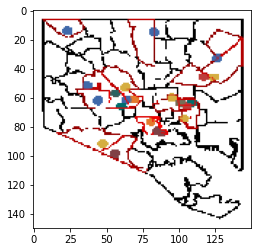

In [145]:
plt.imshow(np.reshape(b[0][4], (150, 150, 3)))

In [146]:
label2=[]
for i in range(15):
    label2.append(b[1][i])

fig = plt.figure(figsize=(20, 20))
for i in range(15):
    
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(b[0][i])
    plt.title(str(label2[i])+'/'+str(test_labels[i]))
    plt.axis("off")


In [147]:
predictions=trained_model.predict(b)

In [148]:
Lablz=np.round(predictions).tolist()

In [149]:
flat_list = []
for sublist in Lablz:
    for item in sublist:
        flat_list.append(item)

In [150]:
correct=sum(x == y for x, y in zip(label2,flat_list))

In [151]:
total=len(flat_list)

In [2]:
print("The percentage of accurate matches from the test set is: "+str(round(correct/total*100,2))+"%")

---

In [142]:
b = next(a)

In [146]:
label2=[]
for i in range(15):
    label2.append(b[1][i])

fig = plt.figure(figsize=(20, 20))
for i in range(15):
    
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(b[0][i])
    plt.title(str(label2[i])+'/'+str(test_labels[i]))
    plt.axis("off")


In [147]:
predictions=trained_model.predict(b)

In [148]:
Lablz=np.round(predictions).tolist()

In [149]:
flat_list = []
for sublist in Lablz:
    for item in sublist:
        flat_list.append(item)

In [150]:
correct=sum(x == y for x, y in zip(label2,flat_list))

In [151]:
total=len(flat_list)

In [1]:
#print("The percentage of accurate matches from the test set is: "+str(round(correct/total*100,2))+"%")

In [231]:
aggacc=[]
for i in range(50):
    b = next(a)

    label2=[]
    for i in range(15):
        label2.append(b[1][i])


    predictions=trained_model.predict(b)

    Lablz=np.round(predictions).tolist()

    flat_list = []
    for sublist in Lablz:
        for item in sublist:
            flat_list.append(item)

    correct=sum(x == y for x, y in zip(label2,flat_list))

    total=len(flat_list)

    print("The percentage of accurate matches from the test set is: "+str(round(correct/total*100,2))+"%")
    aggacc.append(round(correct/total*100,2))

The percentage of accurate matches from the test set is: 80.0%
The percentage of accurate matches from the test set is: 86.67%
The percentage of accurate matches from the test set is: 93.33%
The percentage of accurate matches from the test set is: 93.33%
The percentage of accurate matches from the test set is: 86.67%
The percentage of accurate matches from the test set is: 60.0%
The percentage of accurate matches from the test set is: 80.0%
The percentage of accurate matches from the test set is: 93.33%
The percentage of accurate matches from the test set is: 66.67%
The percentage of accurate matches from the test set is: 66.67%
The percentage of accurate matches from the test set is: 93.33%
The percentage of accurate matches from the test set is: 93.33%
The percentage of accurate matches from the test set is: 80.0%
The percentage of accurate matches from the test set is: 86.67%
The percentage of accurate matches from the test set is: 73.33%
The percentage of accurate matches from the 

In [232]:
import statistics
statistics.mean(aggacc)

78.4004

---